Data Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               1000 non-null   object 
 1   AGE               1000 non-null   int64  
 2   UNIT              1000 non-null   object 
 3   DESIGNATION       1000 non-null   object 
 4   PAST EXP          1000 non-null   int64  
 5   RATINGS           1000 non-null   int64  
 6   DOJ               1000 non-null   object 
 7   CURRENT DATE      1000 non-null   object 
 8   years_experience  1000 non-null   float64
 9   SALARY            1000 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None
               AGE     PAST EXP      RATINGS  years_experience         SALARY
count  1000.000000  1000.000000  1000.000000       1000.000000    1000.000000
mean     40.054000     4.622000     2.971000          7.577900   65698.160000
std

C:\Users\shada\AppData\Local\Temp\ipykernel_4480\577667239.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SEX', palette='Set2')


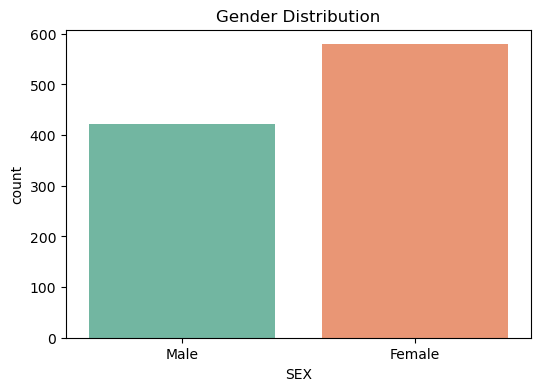

C:\Users\shada\AppData\Local\Temp\ipykernel_4480\577667239.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='UNIT', palette='pastel')


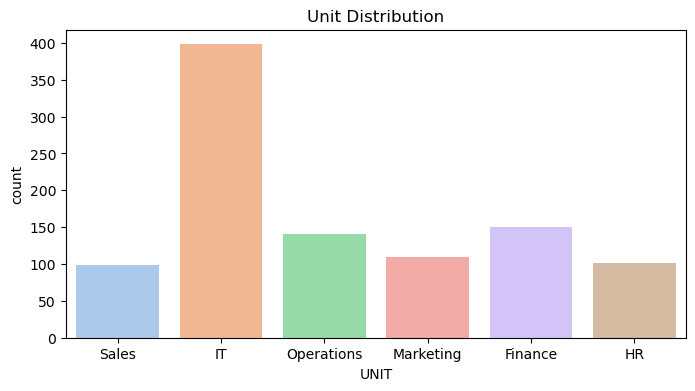

C:\Users\shada\AppData\Local\Temp\ipykernel_4480\577667239.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DESIGNATION', palette='coolwarm')


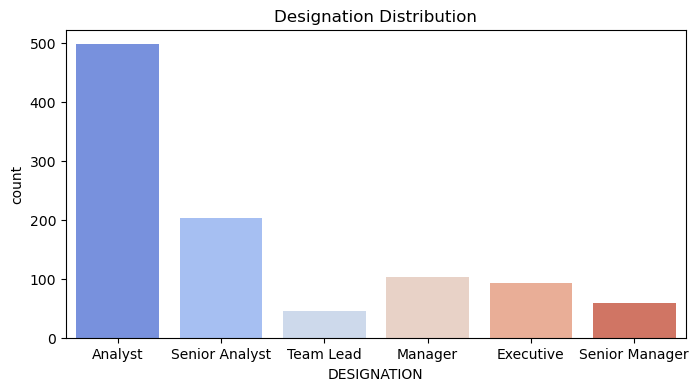

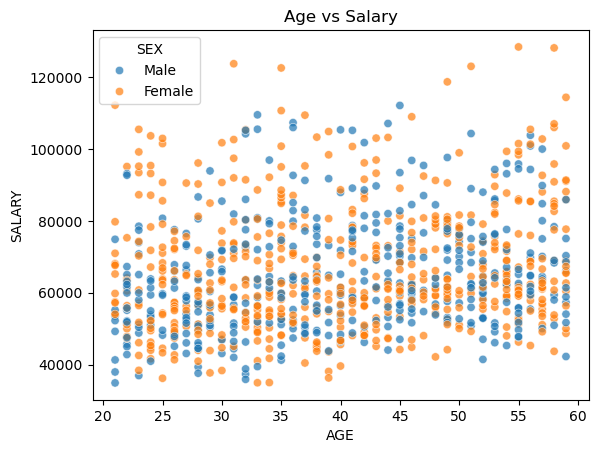

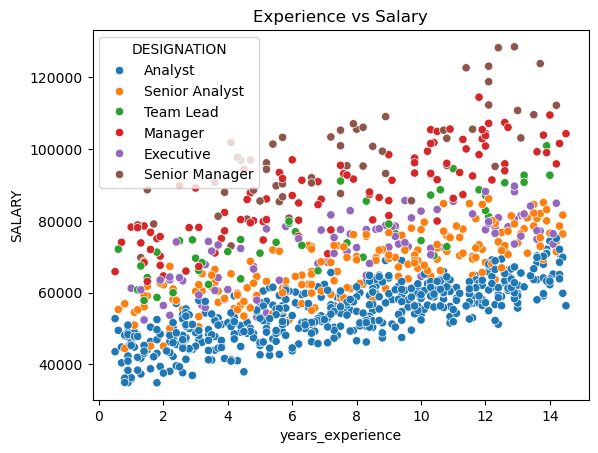

C:\Users\shada\AppData\Local\Temp\ipykernel_4480\577667239.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RATINGS', palette='Blues')


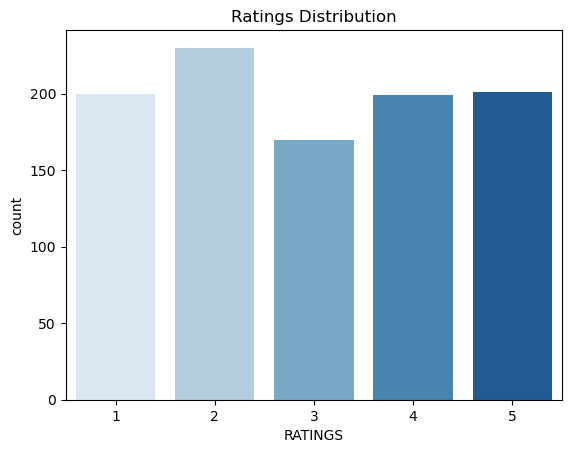

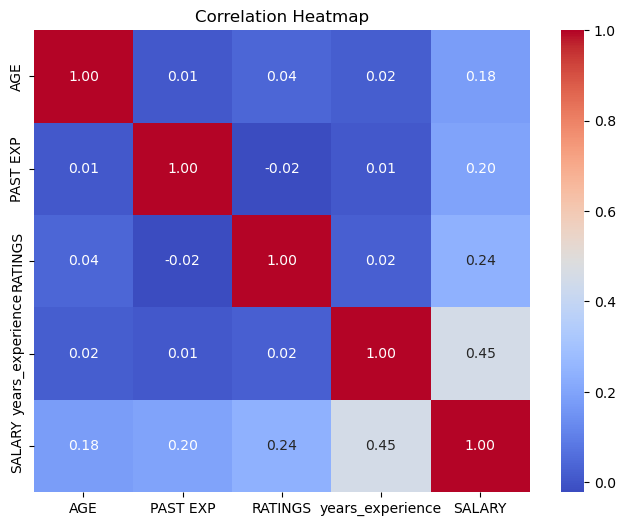

Encoded values for SEX: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded values for UNIT: {'Finance': np.int64(0), 'HR': np.int64(1), 'IT': np.int64(2), 'Marketing': np.int64(3), 'Operations': np.int64(4), 'Sales': np.int64(5)}
Encoded values for DESIGNATION: {'Analyst': np.int64(0), 'Executive': np.int64(1), 'Manager': np.int64(2), 'Senior Analyst': np.int64(3), 'Senior Manager': np.int64(4), 'Team Lead': np.int64(5)}
   SEX       AGE  UNIT  DESIGNATION  PAST EXP   RATINGS  years_experience  \
0    1 -0.714847     5            0 -1.627437 -0.676471         -1.598467   
1    0 -0.358498     2            0  0.844777  0.728725          1.060036   
2    0  0.354200     2            3 -0.921091 -1.379069         -0.345903   
3    0 -0.091236     5            0  0.491603 -0.676471         -1.802968   
4    1 -1.071196     2            3  1.551124  1.431322          1.060036   

    SALARY  TOTAL_EXPERIENCE  
0  37350.0         -2.244495  
1  64750.0          1.351258  
2  56520.0       

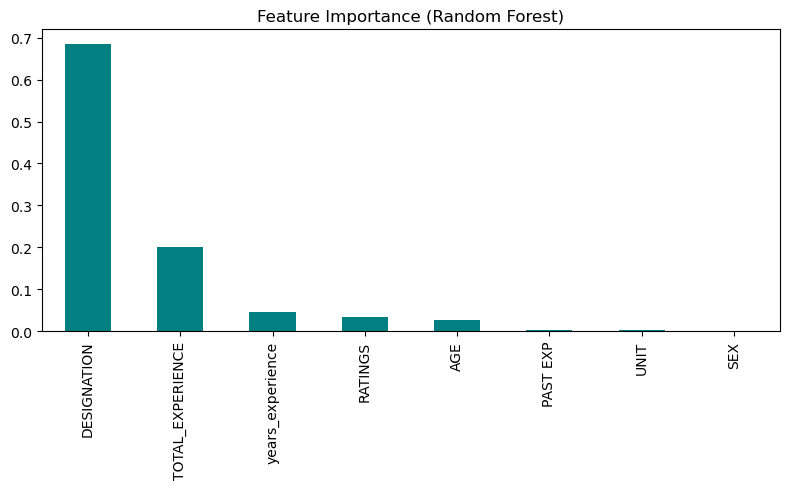

Processed data saved as 'processed_data.csv'
Feature order saved as 'feature_order.pkl'


In [7]:
# STEP 1: EDA + STEP 2: Data Processing & Feature Selection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load Data
df = pd.read_csv("data/synthetic_employee_data.csv")
print("Data Loaded Successfully")


print(df.info())
print(df.describe())

# Null Value Check
print("🔍 Null Values:\n", df.isnull().sum())

# Categorical Distributions
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SEX', palette='Set2')
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='UNIT', palette='pastel')
plt.title("Unit Distribution")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DESIGNATION', palette='coolwarm')
plt.title("Designation Distribution")
plt.show()

# Numerical Distributions
sns.scatterplot(data=df, x='AGE', y='SALARY', hue='SEX', alpha=0.7)
plt.title("Age vs Salary")
plt.show()

sns.scatterplot(data=df, x='years_experience', y='SALARY', hue='DESIGNATION')
plt.title("Experience vs Salary")
plt.show()

sns.countplot(data=df, x='RATINGS', palette='Blues')
plt.title("Ratings Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Outlier Handling (Optional)
df = df[df['SALARY'] < 120000]  # Remove very high salary outliers
df = df[df['AGE'] >= 20]        # Age filter
df = df[df['RATINGS'] >= 1]     # Valid rating check

# Feature Engineering
df["TOTAL_EXPERIENCE"] = df["years_experience"] + df["PAST EXP"]

# Drop Unwanted Columns
df.drop(columns=["DOJ", "CURRENT DATE"], inplace=True)

# Encoding Categorical Columns
cat_cols = ["SEX", "UNIT", "DESIGNATION"]
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

  
    print(f"Encoded values for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

#Save Encoders for Future Use
with open("pkl/label_encoders.pkl", "wb") as f:
    pickle.dump(le_dict, f)

#Feature Scaling (Optional)
scaler = StandardScaler()
num_cols = ["AGE", "PAST EXP", "RATINGS", "years_experience", "TOTAL_EXPERIENCE"]

df[num_cols] = scaler.fit_transform(df[num_cols])

# Save Scaler
with open("pkl/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# final Data Preview
print(df.head())
print("Final Columns:", df.columns.tolist())


X = df.drop("SALARY", axis=1)
y = df["SALARY"]

rf = RandomForestRegressor()
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importances
plt.figure(figsize=(8, 5))
importances.plot(kind='bar', color='teal')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Save Processed Data
df.to_csv("data/processed_data.csv", index=False)
print("Processed data saved as 'processed_data.csv'")

# ave Feature Order 
with open("pkl/feature_order.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
print("Feature order saved as 'feature_order.pkl'")
